In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from hamiltonians.utils.graph_utils import create_random_weighted_graph
from hamiltonians.problems import MaxCutProblem

ImportError: cannot import name 'get_modifiers' from 'hamiltonians.parameter_modifiers' (/Users/fede/Projects/COHamiltonians/src/hamiltonians/parameter_modifiers/__init__.py)

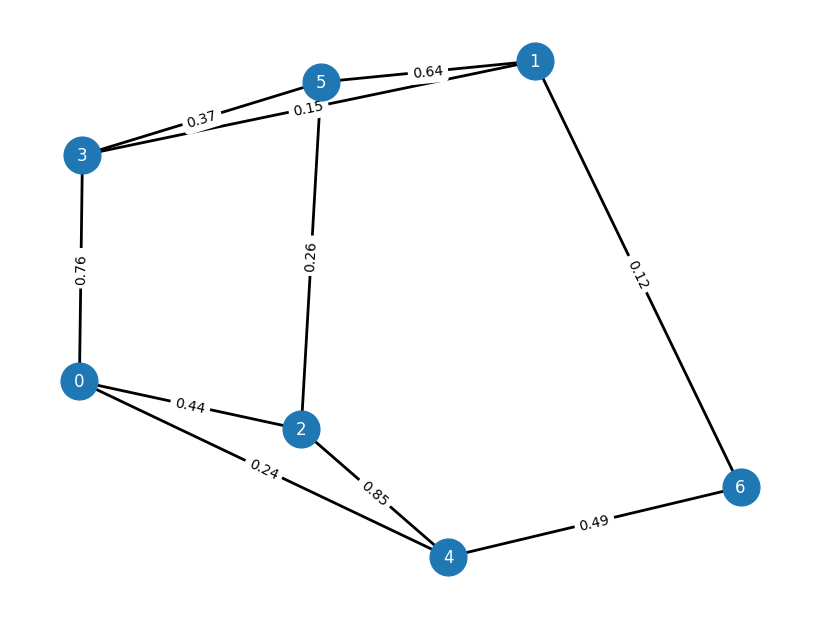

In [4]:
g = create_random_weighted_graph(n_nodes=7, edge_probability=0.4, init_weight_range=(0.1, 1.0), edge_param_range=(0.1, 1.0), seed=42)

maxcut = MaxCutProblem(g)
maxcut.visualize_graph()

In [5]:
maxcut.solve_classically()

{'bitstring': '0111001',
 'assignment': {0: 0, 1: 1, 2: 1, 3: 1, 4: 0, 5: 0, 6: 1},
 'partition': [[0, 4, 5], [1, 2, 3, 6]],
 'cut_value': 3.8122935478100373}

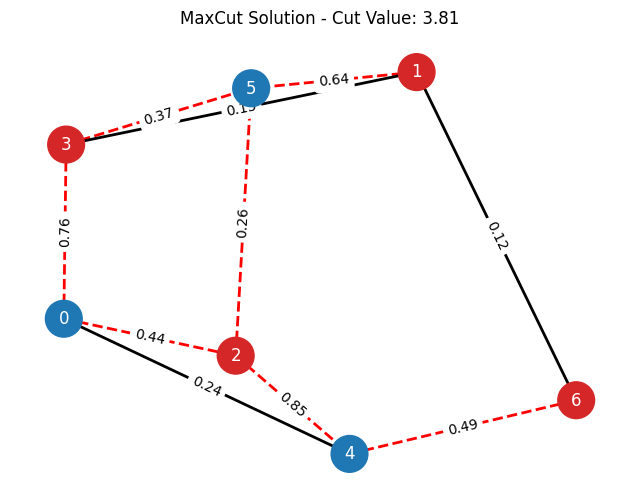

In [6]:
maxcut.visualize_solution(maxcut.solutions['brute_force'])

In [9]:
maxcut.build_hamiltonian()
print(maxcut.hamiltonian)
print(maxcut.hamiltonian.to_pennylane())

- 0.22 * Z0@Z2 - 0.38 * Z0@Z3 - 0.12 * Z0@Z4 - 0.08 * Z1@Z3 - 0.32 * Z1@Z5 - 0.06 * Z1@Z6 - 0.42 * Z2@Z4 - 0.13 * Z2@Z5 - 0.19 * Z3@Z5 - 0.24 * Z4@Z6 + 2.161755810012916
-0.21854305348131314 * (Z(0) @ Z(2)) + -0.3793972738151323 * (Z(0) @ Z(3)) + -0.12020838819909643 * (Z(0) @ Z(4)) + -0.07613762547568977 * (Z(1) @ Z(3)) + -0.32050175528444397 * (Z(1) @ Z(5)) + -0.0592630224331111 * (Z(1) @ Z(6)) + -0.4245991883601898 * (Z(2) @ Z(4)) + -0.13182123524319528 * (Z(2) @ Z(5)) + -0.186909009331792 * (Z(3) @ Z(5)) + -0.24437525838895208 * (Z(4) @ Z(6)) + 2.161755810012916 * I(0)


In [10]:
maxcut.print_modifier_functions(verbose=True)


Available modifier functions for MaxCut:
  * linear
    Code: <Built-in function, source not available>
  * quadratic
    Code: <Built-in function, source not available>
  * qubic
    Code: <Built-in function, source not available>
  * exponential
    Code: <Built-in function, source not available>
  * linear_edge_scaling
    Code: <Built-in function, source not available>
  * quadratic_edge_scaling
    Code: <Built-in function, source not available>
  * qubic_edge_scaling
    Code: <Built-in function, source not available>
  * edge_density_scaling
    Code: <Built-in function, source not available>
  * degree_weighted
    Code: <Built-in function, source not available>
  * weighted_sine
    Code: <Built-in function, source not available>
  * weight_emphasis
    Code: <Built-in function, source not available>


In [12]:
maxcut.modify_parameters("weighted_sine", factor=9, angle=2.8)

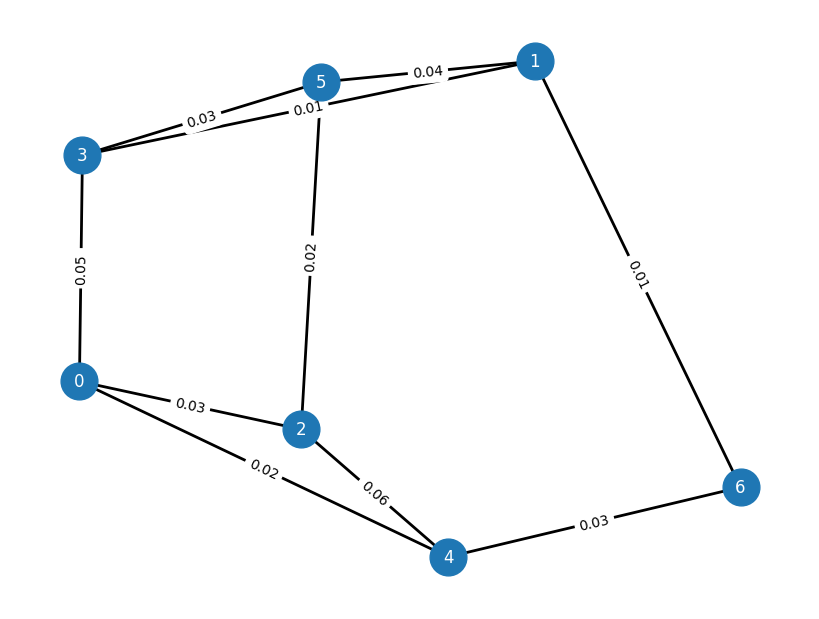

In [13]:
maxcut.visualize_graph()

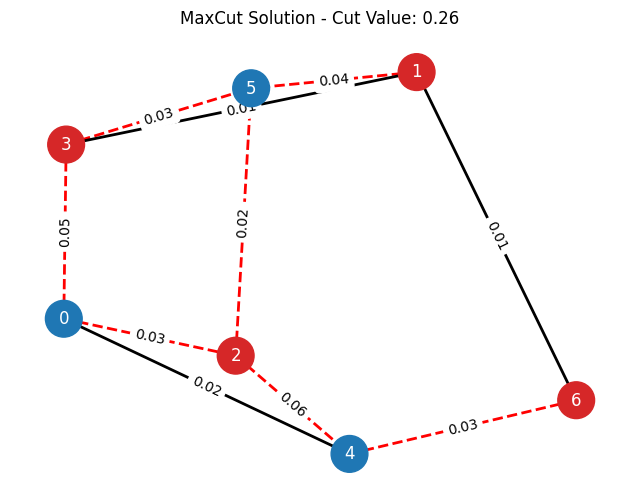

In [14]:
maxcut.solve_classically()
maxcut.visualize_solution(maxcut.solutions['brute_force'])

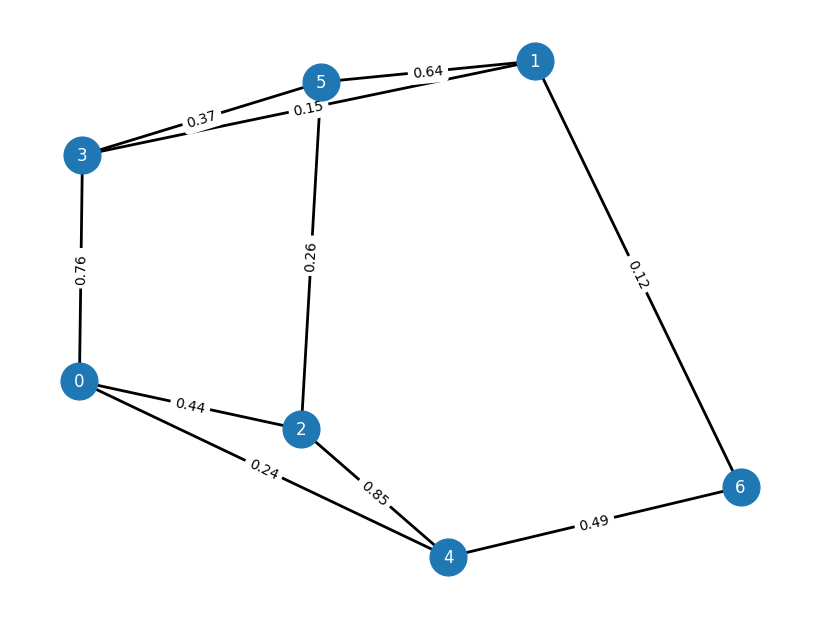

In [16]:
maxcut.reset_parameters()
maxcut.visualize_graph()

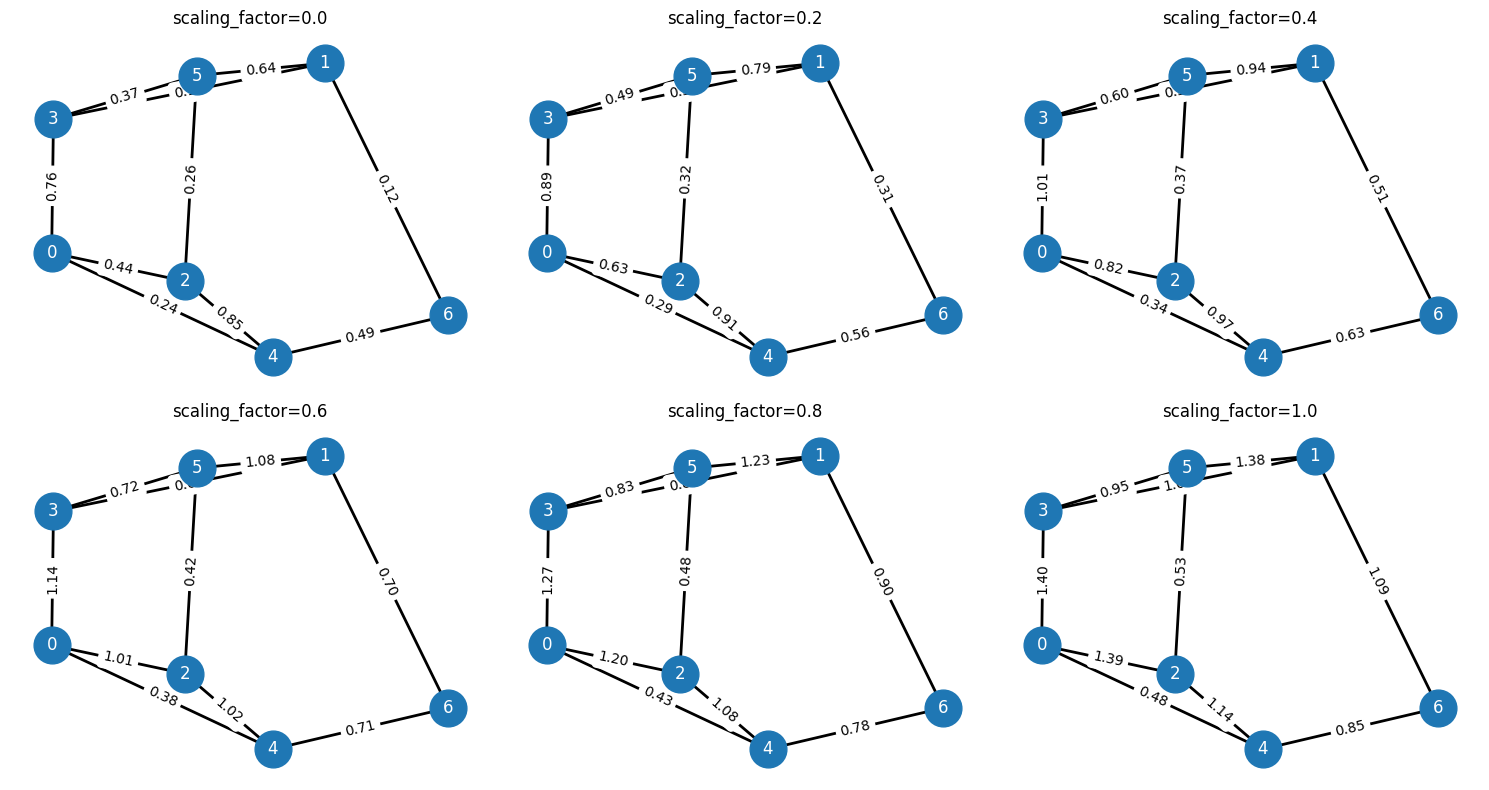

In [ ]:
import matplotlib.pyplot as plt

scaling_factors = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
n = len(scaling_factors)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 8))
axes = axes.flatten()

for idx, scaling in enumerate(scaling_factors):
    maxcut.reset_parameters()
    maxcut.modify_parameters("linear_edge_scaling", scaling_factor=scaling)
    plt.sca(axes[idx])
    maxcut.draw_graph()
    axes[idx].set_title(f"scaling_factor={scaling}")

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()